## Om Prakash Singh

In [44]:
# importing the required libraries
import pandas as pd

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.graph_objs as go
import folium 
from folium import plugins

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [45]:
#how to read a .xls file by creating a dataframe using pandas
# Reading the datasets
df= pd.read_excel('Covid cases in India.xlsx')
df_india = df.copy()
df

,Name of State / UT,Total Confirmed cases (Including 76 foreign Nationals),Cured,Death
0,Andhra Pradesh,603,42,15
1,Bihar,85,42,15
2,Chhattisgarh,36,24,0
3,Delhi,1707,72,42
4,Gujarat,1272,88,48
5,Haryana,225,43,3
6,Himachal Pradesh,38,16,1
7,Karnataka,371,92,13
8,Kerala,396,255,3
9,Madhya Pradesh,1355,69,69


In [46]:
# Coordinates of India States and Union Territories
India_coord = pd.read_excel('Indian Coordinates.xlsx')

#Day by day data of India, Korea, Italy,USA and Wuhan
dbd_India = pd.read_excel('per_day_cases.xlsx',parse_dates=True, sheet_name='India')
dbd_Italy = pd.read_excel('per_day_cases.xlsx',parse_dates=True, sheet_name="Italy")
dbd_Korea = pd.read_excel('per_day_cases.xlsx',parse_dates=True, sheet_name="Korea")
dbd_Wuhan = pd.read_excel('per_day_cases.xlsx',parse_dates=True, sheet_name="Wuhan")
dbd_USA = pd.read_excel('per_day_cases.xlsx',parse_dates=True, sheet_name="USA")


In [47]:
#play around with the dataframe and create a new attribute of 'Total Case'
#Total case is the total number of confirmed cases (Indian National + Foreign National)

#df.drop(['S. No.'],axis=1,inplace=True)
#df['Total cases'] = df['Total Confirmed cases (Indian National)'] + df['Total Confirmed cases ( Foreign National )']
df['Total cases'] = df['Total Confirmed cases (Including 76 foreign Nationals)']
total_cases = df['Total cases'].sum()
print('Total number of confirmed COVID 2019 cases across India till date (18th April, 2020):', total_cases)

Total number of confirmed COVID 2019 cases across India till date (18th April, 2020): 14791


In [48]:
#highlight the dataframe
df.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Confirmed cases (Including 76 foreign Nationals),Cured,Death,Total cases
0,Andhra Pradesh,603,42,15,603
1,Bihar,85,42,15,85
2,Chhattisgarh,36,24,0,36
3,Delhi,1707,72,42,1707
4,Gujarat,1272,88,48,1272
5,Haryana,225,43,3,225
6,Himachal Pradesh,38,16,1,38
7,Karnataka,371,92,13,371
8,Kerala,396,255,3,396
9,Madhya Pradesh,1355,69,69,1355


In [49]:
#Total Active  is the Total cases - (Number of death + Cured)
df['Total Active'] = df['Total cases'] - (df['Death'] + df['Cured'])
total_active = df['Total Active'].sum()
print('Total number of active COVID 19 cases across India:', total_active)
Tot_Cases = df.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total number of active COVID 19 cases across India: 12274


,Total Active
Name of State / UT,
Maharashtra,2791
Delhi,1593
Madhya Pradesh,1217
Gujarat,1136
Rajasthan,1035
Tamil Nadu,1029
Uttar Pradesh,869
Telengana,587
Andhra Pradesh,546


### Visualising the spread geographically

In [50]:
# Learn how to use folium to create a zoomable map
df_full = pd.merge(India_coord,df,on='Name of State / UT')
map = folium.Map(location=[20, 70], zoom_start=4,tiles='Stamenterrain')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Total cases'], df_full['Name of State / UT']):
    folium.CircleMarker([lat, lon], radius=value*0.009, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

## Confirmed vs Recovered figures

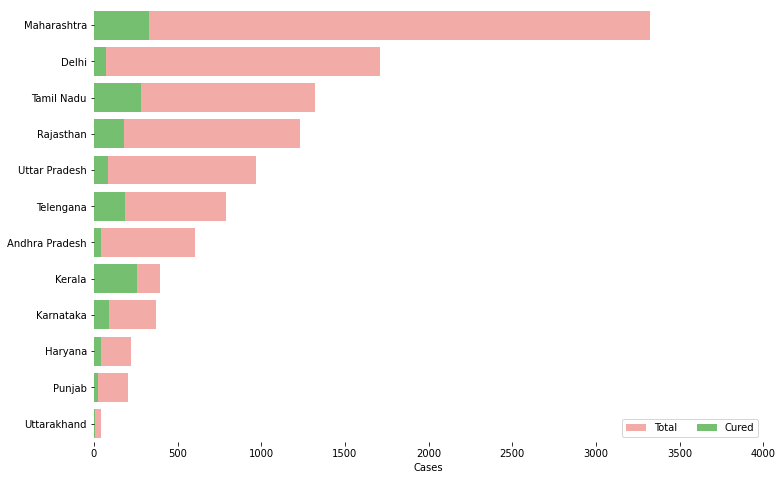

In [51]:
#using Seaborn for visualization
f, ax = plt.subplots(figsize=(12, 8))
data = df_full[['Name of State / UT','Total cases','Cured','Death']]
data.sort_values('Total cases',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total cases", y="Name of State / UT", data=data,label="Total", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Cured", y="Name of State / UT", data=data, label="Cured", color="g")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 4000), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)

## How the Coronavirus cases are rising?

In [52]:
#This cell's code is required when we are working with plotly on colab or offline
import plotly as py
py.offline.init_notebook_mode(connected =True)
#plotly.io.renderers.default = 'colab'

In [13]:
#creating interactive graphs using plotly
# import plotly.graph_objects as go
# Rise of COVID-19 cases in India
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_India['Date'], y = dbd_India['Total Cases'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# New COVID-19 cases reported daily in India

import plotly.express as px
fig = px.bar(dbd_India, x="Date", y="New Cases", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in India on daily basis',plot_bgcolor='rgb(230, 230, 230)')

fig.show()

### Is the trend similar to Italy/ S.Korea/ USA/WUHAN?

In [53]:
# import plotly.express as px
fig = px.bar(dbd_India, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in India', color_discrete_sequence = px.colors.cyclical.IceFire)

'''Colour Scale for plotly
https://plot.ly/python/builtin-colorscales/
'''

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_Italy, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Italy', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()
fig = px.bar(dbd_USA, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in USA', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_Korea, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in South Korea', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()
fig = px.bar(dbd_Wuhan, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Wuhan', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [54]:
#Learn how to create subplots using plotly
# import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("USA","Italy", "India","USA"))

#fig.add_trace(go.Bar(x=dbd_Korea['Date'], y=dbd_Korea['Total Cases'],
#                    marker=dict(color=dbd_Korea['Total Cases'], coloraxis="coloraxis")),1, 1)
fig.add_trace(go.Bar(x=dbd_USA['Date'], y=dbd_USA['Total Cases'],
                    marker=dict(color=dbd_USA['Total Cases'], coloraxis="coloraxis")),1, 1)

fig.add_trace(go.Bar(x=dbd_Italy['Date'], y=dbd_Italy['Total Cases'],
                    marker=dict(color=dbd_Italy['Total Cases'], coloraxis="coloraxis")),1, 2)

fig.add_trace(go.Bar(x=dbd_India['Date'], y=dbd_India['Total Cases'],
                    marker=dict(color=dbd_India['Total Cases'], coloraxis="coloraxis")),2, 1)

#fig.add_trace(go.Bar(x=dbd_Wuhan['Date'], y=dbd_Wuhan['Total Cases'],
#                    marker=dict(color=dbd_Wuhan['Total Cases'], coloraxis="coloraxis")),2, 2)

fig.update_layout(coloraxis=dict(colorscale='RdBu'), showlegend=False,title_text="Total Confirmed cases(Cumulative)")

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [82]:
# Trend after crossing 100 cases
# import plotly.graph_objects as go

title = 'Main Source for News'
labels = ['USA', 'Italy', 'India']
colors = ['rgb(122,128,0)', 'rgb(255,0,0)', 'rgb(49,130,189)']

mode_size = [10, 10, 12]
line_size = [1, 1, 8]

fig = go.Figure()


fig.add_trace(go.Scatter(x=dbd_USA['Days after surpassing 100 cases'], 
                 y=dbd_USA['Total Cases'],mode='lines',
                 name=labels[0],
                 line=dict(color=colors[0], width=line_size[0]),            
                 connectgaps=True))
fig.add_trace(go.Scatter(x=dbd_Italy['Days after surpassing 100 cases'], 
                 y=dbd_Italy['Total Cases'],mode='lines',
                 name=labels[1],
                 line=dict(color=colors[1], width=line_size[1]),            
                 connectgaps=True))

fig.add_trace(go.Scatter(x=dbd_India['Days after surpassing 100 cases'], 
                 y=dbd_India['Total Cases'],mode='lines',
                 name=labels[2],
                 line=dict(color=colors[2], width=line_size[2]),            
                 connectgaps=True))
    
    
    
annotations = []

annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Days after crossing 100 cases ',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

fig.update_layout(annotations=annotations,plot_bgcolor='white',yaxis_title='Cumulative cases')
plt.savefig("Cumulative cases")
fig.show()

<Figure size 720x864 with 0 Axes>

 ## Exploring World wide data

In [56]:
df = pd.read_csv('covid_19_clean_complete.csv',parse_dates=['Date'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

df_confirmed = pd.read_csv("time_series_covid19_confirmed_global.csv")
df_recovered = pd.read_csv("time_series_covid19_recovered_global.csv")
df_deaths = pd.read_csv("time_series_covid19_deaths_global.csv")

df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [57]:
df_deaths.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,14,15,15,18,18,21,23,25,30,30
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,22,23,23,23,23,23,24,25,26,26
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,205,235,256,275,293,313,326,336,348,364
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,23,25,26,26,29,29,31,33,33,35
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [58]:
df.head(-1)

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.00000,65.000000,2020-01-22,0,0,0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0
...,...,...,...,...,...,...,...,...
23050,Falkland Islands (Malvinas),United Kingdom,-51.79630,-59.523600,2020-04-18,11,0,3
23051,Saint Pierre and Miquelon,France,46.88520,-56.315900,2020-04-18,1,0,0
23052,NaN,South Sudan,6.87700,31.307000,2020-04-18,4,0,0
23053,NaN,Western Sahara,24.21550,-12.885800,2020-04-18,6,0,0


In [59]:
df2 = df.groupby(["Date", "Country", "Province/State"])[['Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
df2.head()

,Date,Country,Province/State,Confirmed,Deaths,Recovered
0,2020-01-22,Australia,Australian Capital Territory,0,0,0
1,2020-01-22,Australia,New South Wales,0,0,0
2,2020-01-22,Australia,Northern Territory,0,0,0
3,2020-01-22,Australia,Queensland,0,0,0
4,2020-01-22,Australia,South Australia,0,0,0


In [60]:
# Check for India's data
df.query('Country=="India"').groupby("Date")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,0,0,0
1,2020-01-23,0,0,0
2,2020-01-24,0,0,0
3,2020-01-25,0,0,0
4,2020-01-26,0,0,0
...,...,...,...,...
83,2020-04-14,11487,393,1359
84,2020-04-15,12322,405,1432
85,2020-04-16,13430,448,1768
86,2020-04-17,14352,486,2041


In [61]:
#Overall worldwide Confirmed/ Deaths/ Recovered cases 
df.groupby('Date').sum().head()

,Lat,Long,Confirmed,Deaths,Recovered
Date,,,,,
2020-01-22,5615.595617,5920.673761,555,17,28
2020-01-23,5615.595617,5920.673761,654,18,30
2020-01-24,5615.595617,5920.673761,941,26,36
2020-01-25,5615.595617,5920.673761,1434,42,39
2020-01-26,5615.595617,5920.673761,2118,56,52


In [84]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [85]:
fig = go.Figure()
#Plotting datewise confirmed cases
fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='Worldwide NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))
plt.savefig("World wide Covid 19 cases")
fig.show()

<Figure size 720x864 with 0 Axes>

In [86]:
from fbprophet import Prophet

In [87]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [88]:
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [89]:
confirmed.tail()

,ds,y
83,2020-04-14,1976188
84,2020-04-15,2056051
85,2020-04-16,2152643
86,2020-04-17,2240187
87,2020-04-18,2317755


In [90]:
m = Prophet(interval_width=0.95,yearly_seasonality=True,daily_seasonality=True)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

,ds
90,2020-04-21
91,2020-04-22
92,2020-04-23
93,2020-04-24
94,2020-04-25


In [91]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
90,2020-04-21,2.521740e+06,2.514814e+06,2.528167e+06
91,2020-04-22,2.572347e+06,2.565680e+06,2.579001e+06
92,2020-04-23,2.612569e+06,2.606209e+06,2.619761e+06
93,2020-04-24,2.634471e+06,2.627048e+06,2.641513e+06
94,2020-04-25,2.630809e+06,2.623399e+06,2.638548e+06


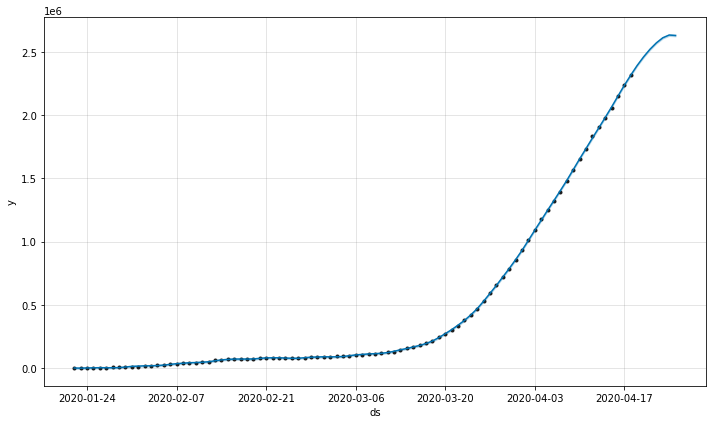

In [92]:
confirmed_forecast_plot = m.plot(forecast)
plt.savefig("confirmed_forecast_plot")

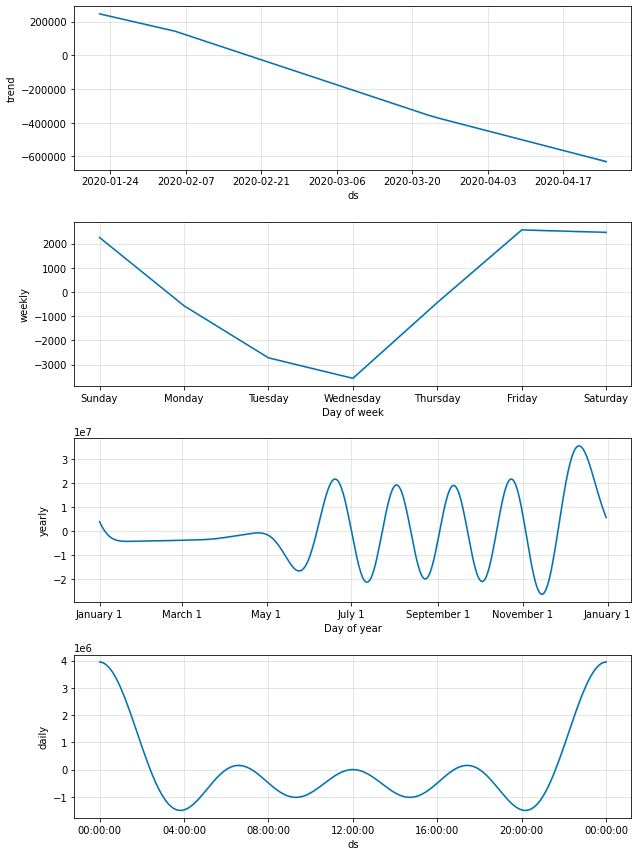

In [93]:
confirmed_forecast_plot =m.plot_components(forecast)
plt.savefig("confirmed_forecast_trend")

### Forecasting Worldwide Deaths using Prophet (Base model)

In [72]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [73]:
m = Prophet(interval_width=0.95,yearly_seasonality=True,daily_seasonality=True)
m.fit(deaths)
future = m.make_future_dataframe(periods=7)
future.tail()

,ds
90,2020-04-21
91,2020-04-22
92,2020-04-23
93,2020-04-24
94,2020-04-25


In [74]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
90,2020-04-21,198821.165733,197956.742043,199786.219752
91,2020-04-22,216385.444290,215466.538716,217214.819954
92,2020-04-23,237294.007591,236403.597737,238210.673844
93,2020-04-24,261989.428373,260987.305117,262817.922243
94,2020-04-25,290584.312905,289766.529791,291410.040465


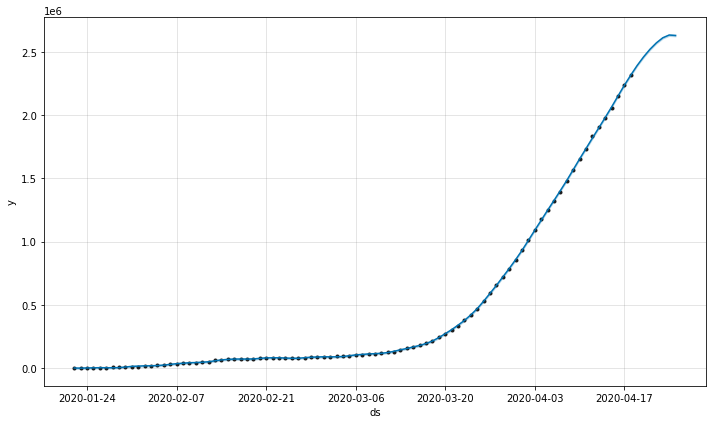

In [94]:
deaths_forecast_plot = m.plot(forecast)
plt.savefig("death_forecast_plot")

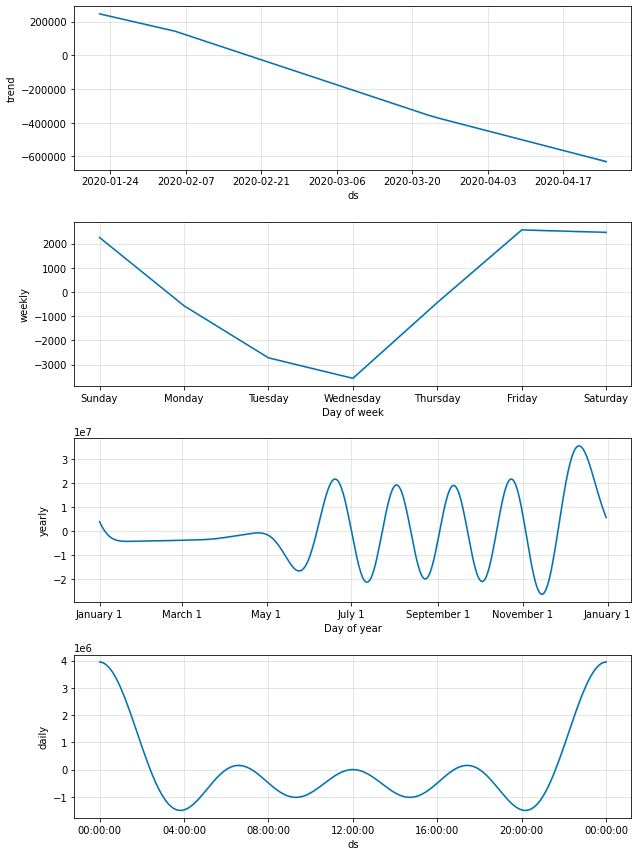

In [95]:
deaths_forecast_plot = m.plot_components(forecast)
plt.savefig("death_forecast_trend")

In [96]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [97]:
m = Prophet(interval_width=0.95,yearly_seasonality=True,daily_seasonality=True)
m.fit(recovered)
future = m.make_future_dataframe(periods=7)
future.tail()

,ds
90,2020-04-21
91,2020-04-22
92,2020-04-23
93,2020-04-24
94,2020-04-25


In [98]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
90,2020-04-21,661113.639540,658007.516850,664050.294952
91,2020-04-22,684162.792638,681258.460491,687182.976465
92,2020-04-23,702653.728120,699459.326640,705810.183663
93,2020-04-24,715463.558862,712422.302607,718642.610905
94,2020-04-25,722827.820213,719969.209520,725744.416060


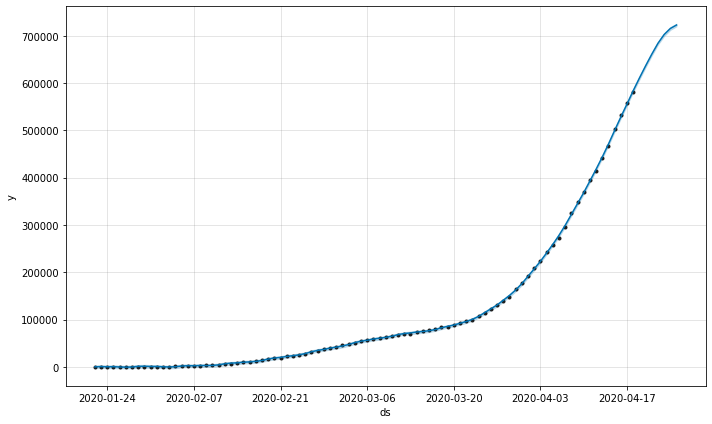

In [100]:
recovered_forecast_plot = m.plot(forecast)
plt.savefig("recovered_forecast_plot")

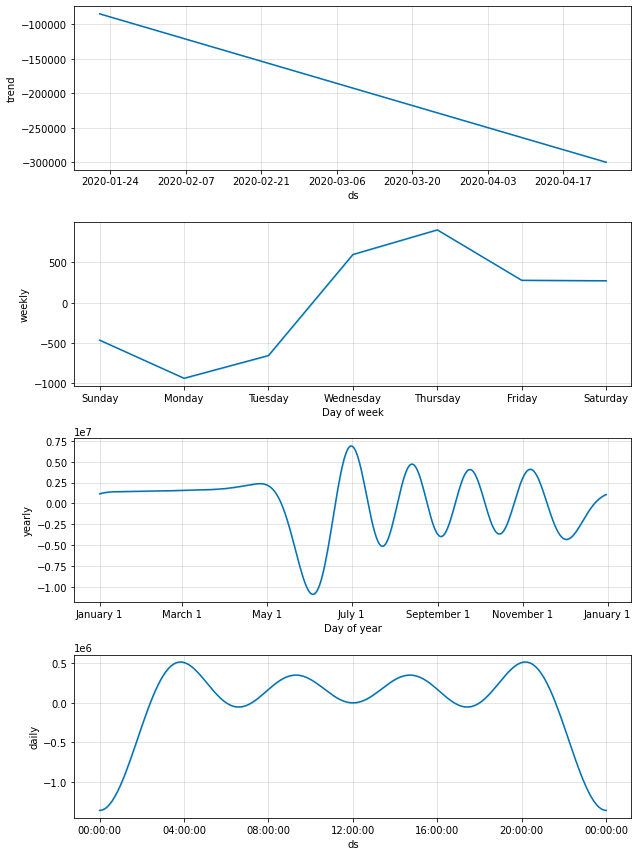

In [101]:
recovered_forecast_plot = m.plot_components(forecast)
plt.savefig("recovered_forecast_Trend")

### data source

https://www.mohfw.gov.in/   

https://www.covid19india.org/

https://docs.google.com/spreadsheets/d/e/2PACX-1vSz8Qs1gE_IYpzlkFkCXGcL_BqR8hZieWVi-rphN1gfrO3H4lDtVZs4kd0C3P8Y9lhsT1rhoB-Q_cP4/pubhtml#

https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases

 USA
https://www.worldometers.info/coronavirus/country/us/#first-cases